In [5]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sc

import matplotlib.pyplot as plt
import h5py
import obspy
from obspy.signal.filter import envelope
from obspy.clients.fdsn import Client
from glob import glob #is a function that’s used to search for files that match a specific file pattern or name.
import random

from scipy import signal

## Read data

this next cell will read the waveform data (H5) and the metadata (CSV)

In [10]:
comcat_file_name = "/data/whd01/yiyu_data/PNWML/comcat_waveforms.hdf5"
comcat_csv_file = "/data/whd01/yiyu_data/PNWML/comcat_metadata.csv"

In [11]:
cat_comcat = pd.read_csv(comcat_csv_file)

In [12]:
cat_comcat.head()

,event_id,source_origin_time,source_latitude_deg,source_longitude_deg,source_type,source_depth_km,preferred_source_magnitude,preferred_source_magnitude_type,preferred_source_magnitude_uncertainty,source_depth_uncertainty_km,...,trace_P_onset,trace_snr_db,source_type_pnsn_label,source_local_magnitude,source_local_magnitude_uncertainty,source_duration_magnitude,source_duration_magnitude_uncertainty,source_hand_magnitude,trace_missing_channel,trace_has_offset
0,uw10564613,2002-10-03T01:56:49.530000Z,48.553,-122.520,earthquake,14.907,2.1,md,0.03,1.68,...,NaN,6.135|3.065|11.766,eq,NaN,NaN,2.1,0.03,NaN,0,1
1,uw10564613,2002-10-03T01:56:49.530000Z,48.553,-122.520,earthquake,14.907,2.1,md,0.03,1.68,...,NaN,nan|nan|22.583,eq,NaN,NaN,2.1,0.03,NaN,2,0
2,uw10564613,2002-10-03T01:56:49.530000Z,48.553,-122.520,earthquake,14.907,2.1,md,0.03,1.68,...,NaN,1.756|3.057|3.551,eq,NaN,NaN,2.1,0.03,NaN,0,1
3,uw10564613,2002-10-03T01:56:49.530000Z,48.553,-122.520,earthquake,14.907,2.1,md,0.03,1.68,...,NaN,nan|nan|27.185,eq,NaN,NaN,2.1,0.03,NaN,2,0
4,uw10568748,2002-09-26T07:00:04.860000Z,48.481,-123.133,earthquake,22.748,2.9,md,0.03,0.91,...,NaN,10.881|17.107|2.242,eq,NaN,NaN,2.9,0.03,NaN,0,1


In [13]:
snrs_comcat = []
for i in range(len(cat_comcat['trace_snr_db'])):
    snrs_comcat.append(np.array(cat_comcat['trace_snr_db'].values[i].split('|')).astype('float')[-1])

In [6]:
snrs_comcat

[11.766,
 22.583,
 3.551,
 27.185,
 2.242,
 29.827,
 21.324,
 5.552,
 34.579,
 36.606,
 32.608,
 30.351,
 2.191,
 34.568,
 44.823,
 -1.803,
 39.426,
 12.587,
 27.469,
 31.801,
 10.775,
 10.774,
 32.427,
 7.592,
 19.454,
 3.433,
 29.876,
 35.168,
 11.666,
 39.497,
 43.462,
 14.765,
 16.487,
 32.624,
 29.662,
 15.991,
 13.449,
 37.465,
 16.971,
 13.653,
 19.44,
 17.363,
 41.496,
 5.479,
 32.285,
 5.694,
 30.898,
 25.675,
 -2.325,
 4.213,
 21.872,
 11.087,
 5.447,
 -0.072,
 18.863,
 10.932,
 10.482,
 19.725,
 20.406,
 31.935,
 25.005,
 41.951,
 11.528,
 23.466,
 3.269,
 29.762,
 27.309,
 2.216,
 13.662,
 36.359,
 24.351,
 28.303,
 26.562,
 17.511,
 16.24,
 36.395,
 36.734,
 15.448,
 11.737,
 4.693,
 16.719,
 29.548,
 5.113,
 8.102,
 26.632,
 -3.078,
 34.417,
 19.753,
 42.531,
 28.176,
 25.784,
 19.961,
 29.114,
 38.952,
 5.361,
 13.816,
 22.558,
 29.743,
 33.591,
 32.352,
 32.651,
 15.413,
 25.838,
 -0.585,
 5.265,
 17.931,
 4.788,
 18.327,
 -1.516,
 20.427,
 22.168,
 -0.774,
 24.359,
 19

(array([1.000e+00, 0.000e+00, 6.000e+00, 8.000e+00, 7.000e+00, 9.000e+00,
        2.100e+01, 4.500e+01, 7.600e+01, 1.190e+02, 1.810e+02, 2.810e+02,
        4.720e+02, 6.740e+02, 9.810e+02, 1.418e+03, 1.996e+03, 2.622e+03,
        3.381e+03, 4.214e+03, 4.925e+03, 5.677e+03, 5.943e+03, 6.270e+03,
        6.217e+03, 6.035e+03, 5.894e+03, 5.783e+03, 5.658e+03, 5.606e+03,
        5.615e+03, 5.688e+03, 5.591e+03, 5.457e+03, 5.304e+03, 5.271e+03,
        5.135e+03, 5.158e+03, 4.855e+03, 4.506e+03, 4.280e+03, 3.997e+03,
        3.860e+03, 3.641e+03, 3.352e+03, 3.104e+03, 2.985e+03, 2.745e+03,
        2.457e+03, 2.323e+03, 2.155e+03, 1.919e+03, 1.800e+03, 1.729e+03,
        1.607e+03, 1.364e+03, 1.263e+03, 1.169e+03, 1.006e+03, 9.130e+02,
        7.430e+02, 7.270e+02, 5.920e+02, 4.930e+02, 4.440e+02, 3.780e+02,
        2.690e+02, 2.720e+02, 2.170e+02, 1.790e+02, 1.410e+02, 1.190e+02,
        1.050e+02, 9.500e+01, 7.700e+01, 6.800e+01, 4.200e+01, 5.900e+01,
        3.700e+01, 4.400e+01, 3.600e+0

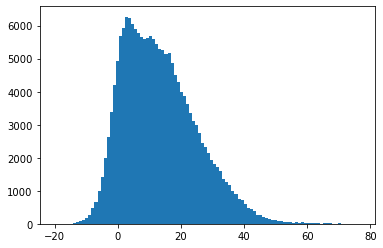

In [7]:
plt.hist(snrs_comcat, 100)

In [14]:
cat_comcat['snr_final'] = snrs_comcat

In [15]:
cat_comcat.head()

,event_id,source_origin_time,source_latitude_deg,source_longitude_deg,source_type,source_depth_km,preferred_source_magnitude,preferred_source_magnitude_type,preferred_source_magnitude_uncertainty,source_depth_uncertainty_km,...,trace_snr_db,source_type_pnsn_label,source_local_magnitude,source_local_magnitude_uncertainty,source_duration_magnitude,source_duration_magnitude_uncertainty,source_hand_magnitude,trace_missing_channel,trace_has_offset,snr_final
0,uw10564613,2002-10-03T01:56:49.530000Z,48.553,-122.520,earthquake,14.907,2.1,md,0.03,1.68,...,6.135|3.065|11.766,eq,NaN,NaN,2.1,0.03,NaN,0,1,11.766
1,uw10564613,2002-10-03T01:56:49.530000Z,48.553,-122.520,earthquake,14.907,2.1,md,0.03,1.68,...,nan|nan|22.583,eq,NaN,NaN,2.1,0.03,NaN,2,0,22.583
2,uw10564613,2002-10-03T01:56:49.530000Z,48.553,-122.520,earthquake,14.907,2.1,md,0.03,1.68,...,1.756|3.057|3.551,eq,NaN,NaN,2.1,0.03,NaN,0,1,3.551
3,uw10564613,2002-10-03T01:56:49.530000Z,48.553,-122.520,earthquake,14.907,2.1,md,0.03,1.68,...,nan|nan|27.185,eq,NaN,NaN,2.1,0.03,NaN,2,0,27.185
4,uw10568748,2002-09-26T07:00:04.860000Z,48.481,-123.133,earthquake,22.748,2.9,md,0.03,0.91,...,10.881|17.107|2.242,eq,NaN,NaN,2.9,0.03,NaN,0,1,2.242


In [16]:
cat_earthquake = cat_comcat[cat_comcat['source_type'] == 'earthquake']
cat_earthquake_good = cat_earthquake.sort_values(by = 'snr_final', ascending = False)
cat_earthquake_good = cat_earthquake_good.iloc[0:5]

In [17]:
cat_earthquake_good

,event_id,source_origin_time,source_latitude_deg,source_longitude_deg,source_type,source_depth_km,preferred_source_magnitude,preferred_source_magnitude_type,preferred_source_magnitude_uncertainty,source_depth_uncertainty_km,...,trace_snr_db,source_type_pnsn_label,source_local_magnitude,source_local_magnitude_uncertainty,source_duration_magnitude,source_duration_magnitude_uncertainty,source_hand_magnitude,trace_missing_channel,trace_has_offset,snr_final
119605,uw61362346,2018-01-03T08:36:25.940000Z,46.256,-122.056,earthquake,10.230,3.82,ml,0.149,0.42,...,70.354|74.938|76.523,eq,3.82,0.149,4.20,0.306,NaN,0,0,76.523
58318,uw60563331,2013-08-03T02:11:16.250000Z,46.327,-122.391,earthquake,13.199,3.12,ml,0.275,0.62,...,78.355|77.278|73.933,eq,3.12,0.275,3.12,0.336,NaN,0,0,73.933
127484,uw61504942,2018-11-19T11:09:13.050000Z,47.698,-123.552,earthquake,39.320,4.08,ml,0.163,0.38,...,61.279|59.563|73.801,eq,4.08,0.163,4.11,0.349,NaN,0,0,73.801
19376,uw10753338,2008-07-31T05:02:43.130000Z,48.152,-122.748,earthquake,55.880,3.87,ml,0.134,0.62,...,61.517|77.406|73.368,eq,3.87,0.134,3.89,0.246,NaN,0,0,73.368
73030,uw60881241,2014-09-17T10:06:12.840000Z,47.561,-123.009,earthquake,16.201,3.98,ml,0.206,0.79,...,69.742|74.111|73.215,eq,3.98,0.176,4.14,0.325,NaN,0,0,73.215


## Define useful functions


In [18]:
def extract_waveforms(cat, file_name):
    
    st = []
    cat_trace = cat['trace_name'].values
    for i in range(len(cat_trace)):

            
 
        f = h5py.File(file_name, 'r')
            
            
        bucket = cat['trace_name'].values[i].split('$')[0]
        ind = int(cat['trace_name'].values[i].split('$')[1].split(',')[0])
        # ENZ
        st.append(f['/data/'+bucket][ind, :3, :18000])
        
    return st


def convert_into_traces(stream, cat):
    channels = ['BHE','BHN','BHZ']
    
    st = []
    for i in range(len(stream)):
        for j in range(len(stream[i])):
            tr = obspy.Trace(stream[i][j])
            tr.stats.channel = channels[j]
            tr.stats.station = cat['station_code'].values[i]
            tr.stats.network = cat['station_network_code'].values[i]
            tr.stats.sampling_rate = 100
            tr.stats.starttime = obspy.UTCDateTime(cat['trace_start_time'].values[i])
            
            st.append(tr)
            
    return obspy.Stream(st)

def plot_waveforms(tr_exotic_Z, title = 'Thunder Waveforms', xlim = [10,100]):


    plt.close('all')
    # Create a figure with subplots
    fig, axs = plt.subplots(len(tr_exotic_Z), 2, figsize=(12, 12))

    # Plot time series and spectrograms
    for i in range(len(tr_exotic_Z)):
        time = tr_exotic_Z[i].times()
        # Plot time series in left subplot
        axs[i, 0].plot(time, tr_exotic_Z[i].data)
        axs[i, 0].set_xlabel('Time')
        axs[i, 0].set_ylabel('Amplitude')
        axs[i, 0].set_title(tr_exotic_Z[i].id)
        axs[i,0].set_xlim(xlim[0], xlim[1])

        # Compute and plot spectrogram in right subplot
        f, t_spec, Sxx = signal.spectrogram(tr_exotic_Z[i].data, fs = 100)
        axs[i, 1].imshow(Sxx, aspect='auto', cmap='jet', origin='lower', extent=[t_spec.min(), t_spec.max(), f.min(), f.max()])
        axs[i, 1].set_xlabel('Time')
        axs[i, 1].set_ylabel('Frequency')
        axs[i, 1].set_title(str(tr_exotic_Z[i].stats.starttime))
        axs[i, 1].set_xlim(xlim[0], xlim[1])
        axs[i, 1].set_ylim(0, 30)
        #axs[i, 1].set_yscale('log')

    # Labelling the figure. 
    fig.suptitle(title, fontsize = 20)


    # Adjust the spacing between subplots
    plt.tight_layout()

    # Show the plot
    plt.show()

In [19]:
stream_earthquake = extract_waveforms(cat_earthquake_good, comcat_file_name)
tr_earthquake_Z = convert_into_traces(stream_earthquake, cat_earthquake_good).select(channel = '*HZ')

In [20]:
tr_earthquake_Z

5 Trace(s) in Stream:
PB.B202..BHZ | 2018-01-03T08:35:35.940000Z - 2018-01-03T08:38:05.940000Z | 100.0 Hz, 15001 samples
PB.B201..BHZ | 2013-08-03T02:10:26.250000Z - 2013-08-03T02:12:56.250000Z | 100.0 Hz, 15001 samples
PB.B003..BHZ | 2018-11-19T11:08:23.050000Z - 2018-11-19T11:10:53.050000Z | 100.0 Hz, 15001 samples
PB.B943..BHZ | 2008-07-31T05:01:53.130000Z - 2008-07-31T05:04:23.130000Z | 100.0 Hz, 15001 samples
UW.DOSE..BHZ | 2014-09-17T10:05:22.840000Z - 2014-09-17T10:07:52.840000Z | 100.0 Hz, 15001 samples

/home/jupyter_share/miniconda3/envs/seismo/lib/python3.8/site-packages/obspy/imaging/util.py:266: UserWarning: AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 30.
  plt.setp(ax.get_xticklabels(), fontsize='small')
/home/jupyter_share/miniconda3/envs/seismo/lib/python3.8/site-packages/obspy/imaging/waveform.py:805: UserWarning: AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 30.
  plt.setp(ax.get_xticklabels(), fontsize='small',


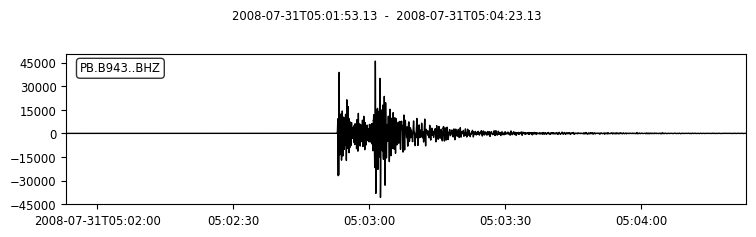

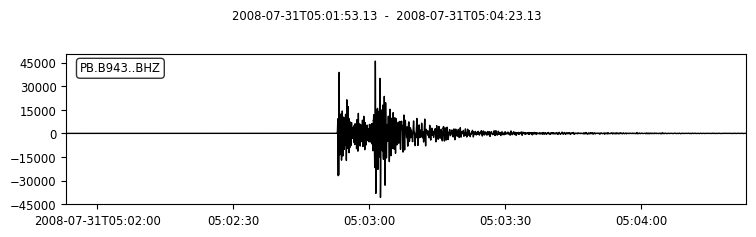

In [15]:
tr_earthquake_Z[3].plot()

In [16]:
len(tr_earthquake_Z)

5

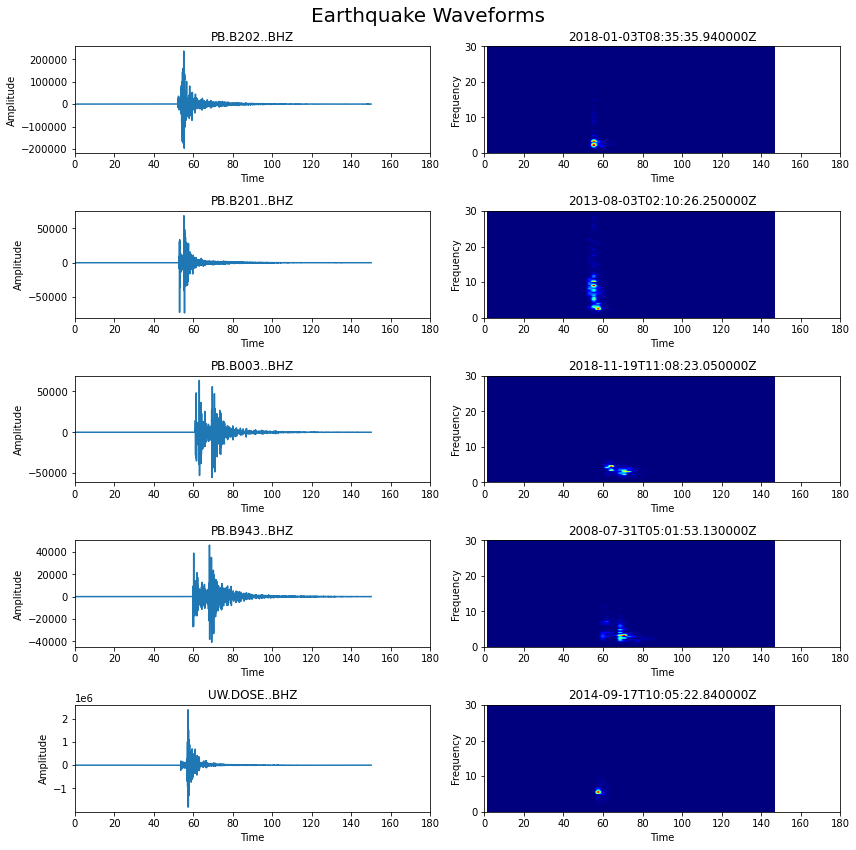

In [19]:
plot_waveforms(tr_earthquake_Z, title="Earthquake Waveforms", xlim=[0,180])

<class 'numpy.ndarray'>


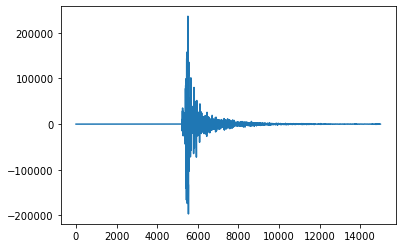

In [21]:
test=tr_earthquake_Z[0].data
plt.plot(test)
print(type(test))

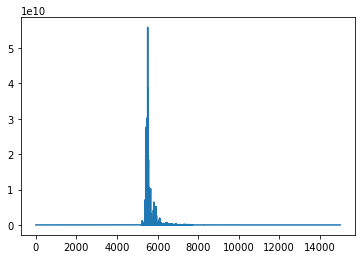

In [25]:
plt.plot(test**2)

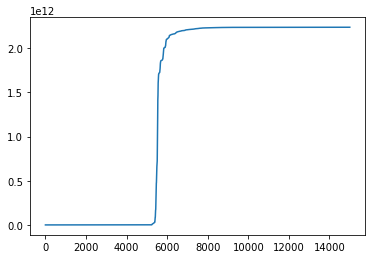

In [27]:
plt.plot(np.cumsum(test**2))
cum_erg = np.cumsum(test**2)
max_erg = cum_erg[-1]

In [41]:
tr_earthquake_Z[0]

PB.B202..BHZ | 2018-01-03T08:35:35.940000Z - 2018-01-03T08:38:05.940000Z | 100.0 Hz, 15001 samples

In [42]:
tr_earthquake_Z[0].stats

         network: PB
         station: B202
        location: 
         channel: BHZ
       starttime: 2018-01-03T08:35:35.940000Z
         endtime: 2018-01-03T08:38:05.940000Z
   sampling_rate: 100.0
           delta: 0.01
            npts: 15001
           calib: 1.0

In [25]:
dt=tr_earthquake_Z[0].stats.delta
print(dt)

0.01


In [26]:
np.where((cum_erg>=0.01*max_erg ) & (cum_erg<=0.95*max_erg))[0]

array([5339, 5340, 5341, 5342, 5343, 5344, 5345, 5346, 5347, 5348, 5349,
       5350, 5351, 5352, 5353, 5354, 5355, 5356, 5357, 5358, 5359, 5360,
       5361, 5362, 5363, 5364, 5365, 5366, 5367, 5368, 5369, 5370, 5371,
       5372, 5373, 5374, 5375, 5376, 5377, 5378, 5379, 5380, 5381, 5382,
       5383, 5384, 5385, 5386, 5387, 5388, 5389, 5390, 5391, 5392, 5393,
       5394, 5395, 5396, 5397, 5398, 5399, 5400, 5401, 5402, 5403, 5404,
       5405, 5406, 5407, 5408, 5409, 5410, 5411, 5412, 5413, 5414, 5415,
       5416, 5417, 5418, 5419, 5420, 5421, 5422, 5423, 5424, 5425, 5426,
       5427, 5428, 5429, 5430, 5431, 5432, 5433, 5434, 5435, 5436, 5437,
       5438, 5439, 5440, 5441, 5442, 5443, 5444, 5445, 5446, 5447, 5448,
       5449, 5450, 5451, 5452, 5453, 5454, 5455, 5456, 5457, 5458, 5459,
       5460, 5461, 5462, 5463, 5464, 5465, 5466, 5467, 5468, 5469, 5470,
       5471, 5472, 5473, 5474, 5475, 5476, 5477, 5478, 5479, 5480, 5481,
       5482, 5483, 5484, 5485, 5486, 5487, 5488, 54

In [27]:
D=len(np.where( (cum_erg>=0.01*max_erg ) & (cum_erg<=0.95*max_erg))[0])*dt
print(D)

7.5


In [24]:
### inputs: test, threshold_low, threshold_high, dt. outputs: D
cum_erg = np.cumsum(test**2)
max_erg = cum_erg[-1]
D=len(np.where( (cum_erg>=0.01*max_erg ) & (cum_erg<=0.95*max_erg))[0])*dt

NameError: name 'dt' is not defined

In [31]:
def func(test, threshold_low, threshold_high, dt):
    cum_erg = np.cumsum(test**2)
    max_erg = cum_erg[-1]
    D=len(np.where( (cum_erg>=threshold_low*max_erg ) & (cum_erg<=threshold_high*max_erg))[0])*dt
    return D

In [ ]:
def func(test, threshold_low, threshold_high, dt):
    cum_erg = np.cumsum(test**2)
    max_erg = cum_erg[-1]
    D=len(np.where( (cum_erg>=threshold_low*max_erg ) & (cum_erg<=threshold_high*max_erg))[0])*dt
    return D

In [40]:
test = tr_earthquake_Z[0].data
threshold_low = 0.05 # The lower threshold
threshold_high = 0.95 # The upper threshold
dt = 0.01 # delta t
print(func(test, threshold_low, threshold_high, dt))

6.71


In [41]:
test

array([ 0.49821228,  0.50241241, -1.49593067, ..., 44.49748751,
       62.50504953, 27.74875629])

In [42]:
len(tr_earthquake_Z)

5

In [66]:
def plot_high_snrs_durations(threshold_low, threshold_high, dt, trace=tr_earthquake_Z):
    durations = []
    for i in range(len(trace)):
        test = trace[i].data
        cum_erg = np.cumsum(test**2)
        max_erg = cum_erg[-1]
        
        D=len(np.where( (cum_erg>=threshold_low*max_erg ) & (cum_erg<=threshold_high*max_erg))[0])*dt         
        durations.append(D)
        
    return durations

In [67]:
trace = tr_earthquake_Z 
threshold_low = 0.05 # The lower threshold
threshold_high = 0.95 # The upper threshold
dt = 0.01 # delta t
print(plot_high_snrs_durations(threshold_low, threshold_high, dt, trace))

[6.71, 6.07, 13.65, 17.32, 4.76]


In [53]:
test = trace[1].data
threshold_low = 0.05 # The lower threshold
threshold_high = 0.95 # The upper threshold
dt = 0.01
cum_erg = np.cumsum(test**2)
max_erg = cum_erg[-1]
len(np.where( (cum_erg>=threshold_low*max_erg ) & (cum_erg<=threshold_high*max_erg))[0])*dt          

607

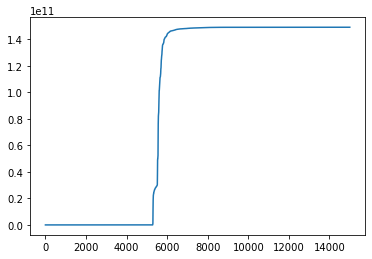

In [56]:
for j in trace:
    cum_erg = np.cumsum(trace[0]**2)
    max_erg = cum_erg[-1]
    threshold_low_fs
    
    plt.plot(cum_erg)
    plt.axvline()

### Finding the durations for high SNRs!

In [76]:
def high_snrs_durations(trace, dt, threshold_low=0.05, threshold_high=0.95):
    durations = []
    for i in range(len(trace)):
        test = trace[i].data
        cum_erg = np.cumsum(test**2) #  Finding the cummulative sum for each trace
        max_erg = cum_erg[-1] # Finding the maximum value of the cummulative sum
        
        D=len(np.where( (cum_erg>=threshold_low*max_erg ) & (cum_erg<=threshold_high*max_erg))[0])*dt         
        durations.append(D)
        
    return durations

In [77]:
# Print a list of duractions
trace = tr_earthquake_Z 
threshold_low = 0.05 # The lower threshold
threshold_high = 0.95 # The upper threshold
dt = 0.01 # delta t
print(high_snrs_durations(threshold_low, threshold_high, dt, trace))

TypeError: object of type 'float' has no len()